In [43]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


Need additional librairies : 
* geopandas : https://geopandas.org/install.html
* descartes : https://docs.descarteslabs.com/installation.html

The following was heavily inspired from this tutorial : https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d

In [44]:
# set the filepath and load in a shapefile
fp = "data\London-wards-2018_ESRI"
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,NAME,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry
0,Chessington South,E05000405,Kingston upon Thames,E09000021,755.173,0.0,"POLYGON ((516401.596 160201.802, 516407.302 16..."
1,Tolworth and Hook Rise,E05000414,Kingston upon Thames,E09000021,259.464,0.0,"POLYGON ((519552.998 164295.600, 519508.096 16..."
2,Berrylands,E05000401,Kingston upon Thames,E09000021,145.390,0.0,"POLYGON ((518107.499 167303.399, 518114.301 16..."
3,Alexandra,E05000400,Kingston upon Thames,E09000021,268.506,0.0,"POLYGON ((520336.700 165105.498, 520332.198 16..."
4,Beverley,E05000402,Kingston upon Thames,E09000021,187.821,0.0,"POLYGON ((521201.203 169275.505, 521204.303 16..."


<AxesSubplot:>

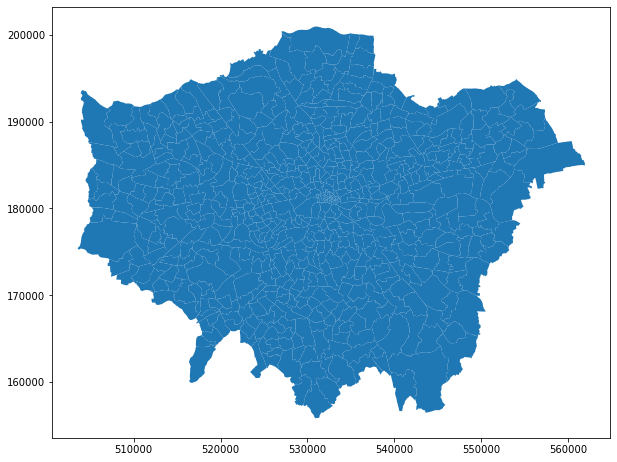

In [45]:
map_df.plot(figsize=(10,10))

In [46]:
# let's import the data:

final = pd.read_csv('final.csv')
final

,area_id,Names,Index
0,E05000029,Chadwell Heath,-4.970499
1,E05000042,Whalebone,-2.508915
2,E05000030,Eastbrook,-0.927090
3,E05000034,Heath,-3.728954
4,E05000040,Valence,1.031461
...,...,...,...
627,E05000295,Kenton West,-6.602660
628,E05011241,Cranbrook,0.428794
629,E05011239,Clayhall,-4.163031
630,E05000222,Greenwich West,-0.966570


In [47]:
# Let's merge the two datasets
merged = map_df.set_index('GSS_CODE').join(final.set_index('area_id'))
merged

,NAME,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry,Names,Index
GSS_CODE,,,,,,,,
E05000405,Chessington South,Kingston upon Thames,E09000021,755.173,0.0,"POLYGON ((516401.596 160201.802, 516407.302 16...",Chessington South,1.101066
E05000414,Tolworth and Hook Rise,Kingston upon Thames,E09000021,259.464,0.0,"POLYGON ((519552.998 164295.600, 519508.096 16...",Tolworth and Hook Rise,-2.606071
E05000401,Berrylands,Kingston upon Thames,E09000021,145.390,0.0,"POLYGON ((518107.499 167303.399, 518114.301 16...",Berrylands,-3.056849
E05000400,Alexandra,Kingston upon Thames,E09000021,268.506,0.0,"POLYGON ((520336.700 165105.498, 520332.198 16...",Alexandra,-6.773889
E05000402,Beverley,Kingston upon Thames,E09000021,187.821,0.0,"POLYGON ((521201.203 169275.505, 521204.303 16...",Beverley,-1.196565
...,...,...,...,...,...,...,...,...
E05009289,Aldgate,City and County of the City of London,E09000001,11.230,0.0,"POLYGON ((533315.597 180988.802, 533305.703 18...",NaN,NaN
E05009295,Broad Street,City and County of the City of London,E09000001,8.157,0.0,"POLYGON ((533005.698 181612.203, 533099.098 18...",NaN,NaN
E05009299,Coleman Street,City and County of the City of London,E09000001,15.061,0.0,"POLYGON ((532552.797 181289.396, 532554.198 18...",NaN,NaN


<AxesSubplot:>

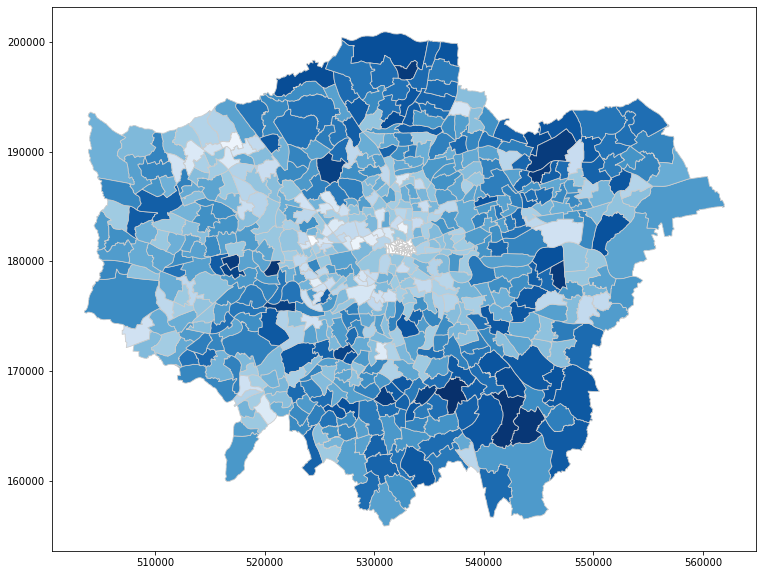

In [48]:
fig, ax = plt.subplots(1, figsize=(15, 10))
merged.plot(column='Index', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
